In [1]:
# Importing required libraries
import pandas as pd            # Library for data manipulation and analysis
import numpy as np             # Library for numerical operations
import seaborn as sns          # Library for data visualization based on matplotlib
import matplotlib.pyplot as plt   # Library for creating visualizations
from sklearn.model_selection import train_test_split   # Module for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler      # Module for feature scaling (standardization)
from sklearn.neighbors import KNeighborsClassifier as KNN    # Module for k-Nearest Neighbors Classifier
from sklearn.tree import DecisionTreeClassifier as DT       # Module for Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier as RF   # Module for Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier as GBC  # Module for Gradient Boosting Classifier
from sklearn.metrics import accuracy_score                # Function for calculating accuracy
from sklearn.svm import SVC                               # Module for Support Vector Classifier (SVC)
from sklearn.metrics import confusion_matrix              # Function for creating a confusion matrix
from sklearn.metrics import classification_report         # Function for generating a classification report



# Importing dataset


In [2]:
# Read the CSV file 'diabetes.csv' and store the data in a DataFrame called 'df'
df = pd.read_csv('diabetes.csv')

# Set the display options for the DataFrame to show all columns
pd.set_option("display.max_columns", None)

# Set the display options for the DataFrame to show all rows
pd.set_option("display.max_rows", None)

# Set the display format for float numbers in the DataFrame to show up to 3 decimal places
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# 1.Dataset Analysis

## 1.1 First, we need to check the dataset to gather information about columns and their types.

In [3]:
#Size of dataset(number of rows, number of columns)
df.shape

(768, 9)

A very small dataset!!

In [4]:
#Displaying first rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [5]:
#Displaying last rows of the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


In [6]:
# To show statistical summary of the columns of our data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


## Columns or Features Description
'Pregnancies': Number of times pregnant
'Glucose': Plasma glucose concentration in a 2-hour oral glucose tolerance test
'BloodPressure': Diastolic blood pressure (mm Hg)
'SkinThickness': Triceps skinfold thickness (mm)
'Insulin': 2-Hour serum insulin (mu U/ml)
'BMI': Body mass index (weight in kg / (height in meters)^2)
'DiabetesPedigreeFunction': Diabetes pedigree function (a measure of the genetic influence)
'Age': Age (years)
'Outcome': Binary variable indicating whether a person has diabetes or not (0 - No, 1 - Yes)

In [7]:
#Identifying information about composition and potential data quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Checking missing values in dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### If the result of 'data.isnull().sum()' shows that all columns have a value of NaN, it means that there are no missing values  in any of the columns of the DataFrame.This is a positive sign because missing values can sometimes cause problems or inaccuracies when analyzing and modeling data. Having a dataset without any missing values allows us to work with complete information for each variable, leading to more reliable and accurate results during analysis and modeling.

## 2.1 Identify Numerical and Categorical variables.

In [9]:
#Displaying the columns in dataset
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Categorical Columns:
Index([], dtype='object')


## 3. Determine the Target Variable.

In [10]:
# Distribution of target variable
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

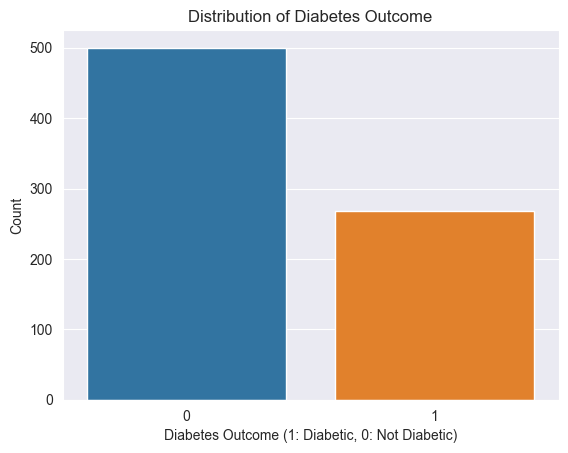

In [11]:
sns.countplot(x="Outcome", data=df)
plt.xlabel("Diabetes Outcome (1: Diabetic, 0: Not Diabetic)")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcome")
plt.show()

Outcome is a feature, which characterize having person diabet or no, where 0 represents no diabetes and 1 represents the presence of diabetes. Accordinglly 500 occurrences of the value 0 (no diabets) and 268 occurrences of the value 1(diabet). You can see that there are twice as many people who don't have diabetes as those who do.

In [12]:
#Grouping the data by the 'Outcome' column and calculating the mean for each group
numerical_mean_by_outcome = df.groupby('Outcome').mean()
print("Mean of Numerical Variables based on 'Outcome':")
numerical_mean_by_outcome

Mean of Numerical Variables based on 'Outcome':


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298,109.980,68.184,19.664,68.792,30.304,0.430,31.190
1,4.866,141.257,70.825,22.164,100.336,35.143,0.550,37.067


By comparing the mean values between classes, a distinction can be made, the feature with the most different mean values between classes is considered important for classification because they may be of discriminating nature between classes and help in separating them and if they are not discriminating, it may indicate that the feature does not have discriminating power and hence unimportant for classification. In our dataset features:Glucose,Insulin are IMPORTANT

## 4. Address Outliers

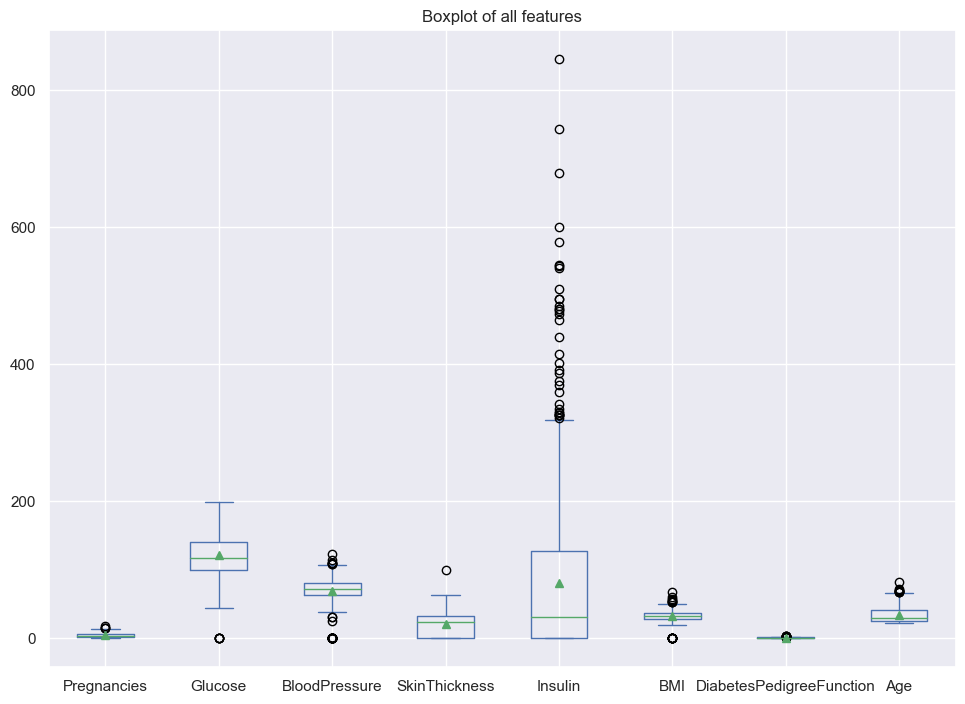

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']].plot(kind='box', title='Boxplot of all features', showmeans=True)
plt.show()

We see that there are outliers in each trait, but the favorite, based on the graph, is Insulin.

In [14]:
#define function to calculate interquartile range
def find_iqr(x):
 return np.subtract (*np.percentile (x, [75, 25]))

#calculate IQR for all columns
df.apply (find_iqr)

Pregnancies                  5.000
Glucose                     41.250
BloodPressure               18.000
SkinThickness               32.000
Insulin                    127.250
BMI                          9.300
DiabetesPedigreeFunction     0.382
Age                         17.000
Outcome                      1.000
dtype: float64

Pregnancies: The IQR for the number of pregnancies is 5. This means that 50% of the values are between 1 and 6 pregnancies.

Glucose: The IQR for glucose level is 41.25. This means that 50% of the values are between approximately 99 and 140 mg/dL.

BloodPressure: The IQR for blood pressure level is 18. This means that 50% of the values lie between approximately 62 and 80 mmHg.

SkinThickness: the IQR for skin fold thickness is 32. This means that 50% of the values lie in the range of approximately 20 to 52 mm.

Insulin: The IQR for insulin level is 127.25. This means that 50% of the values lie between approximately 46 and 173 units/µL.

BMI: The IQR for body mass index is 9.3. This means that 50% of the values lie between approximately 25 and 34.

DiabetesPedigreeFunction: the IQR for pedigree diabetes function is 0.382. This means that 50% of the values lie between approximately 0.25 and 0.632.

Age: The IQR for age is 17. This means that 50% of the values lie between approximately 24 and 41 years.

Outcome: the IQR for the target variable "Outcome" is 1. This means that 50% of the values lie between classes 0 and 1.

## 5. Handle Missing Values in the data.

In [15]:
missing_values_count = (df == 0).sum()
missing_values_count

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

The "Pregnancies" column contains several zeros, which makes sense as it indicates individuals who have never undergone pregnancy. Fortunately, the "Age" and "DiabetesPedigreeFunction" columns do not have any zeros.

However, some columns like 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' have problematic entries with zeros. For instance, a blood pressure reading of 0 is considered dangerous according to medical standards and could imply a fatal condition. The dataset has 35 entries with zero blood pressure.

Similarly, a glucose level of 0 is life-threatening, and the dataset contains 5 such entries. Insulin levels can be disrupted by diseases like diabetes, leading to very low or undetectable levels. There are 374 entries with insulin level 0, indicating very low or undetectable insulin in those subjects.

Skin thickness measurements with a "Skinfold Caliper" could read 0 if the device lacks skin contact. Hence, 227 entries have SkinThickness as 0.

Lastly, the BMI (Body Mass Index) can only be 0 if weight is 0, which is not logical. The dataset contains 11 entries with BMI as 0.

These zeros seem to be mistakes since they contradict the general scientific consensus. To prepare the dataset for model training, data cleaning and imputation are necessary. However, we must be cautious as imputing or removing zeros may introduce bias or data leakage, posing a challenge for data handling and model building.

## 6.Univariate analysis

<Figure size 600x400 with 0 Axes>

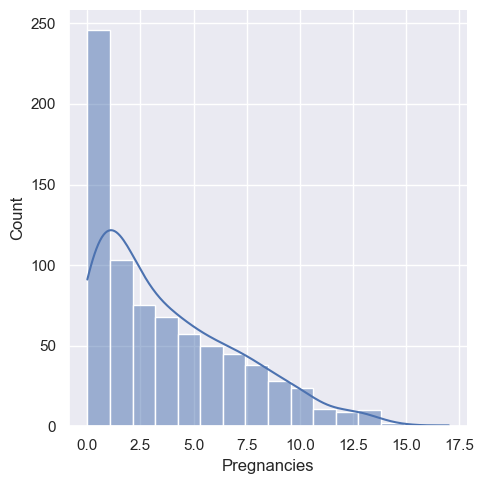

<Figure size 600x400 with 0 Axes>

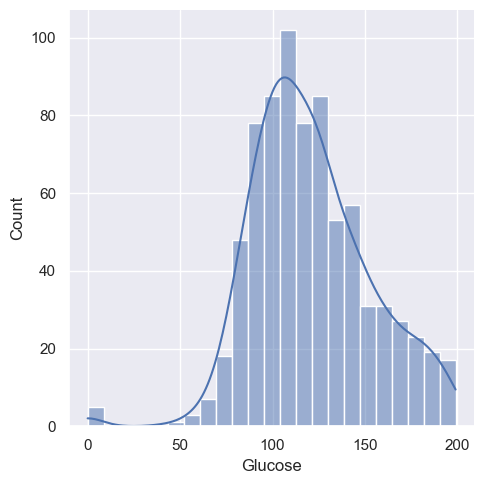

<Figure size 600x400 with 0 Axes>

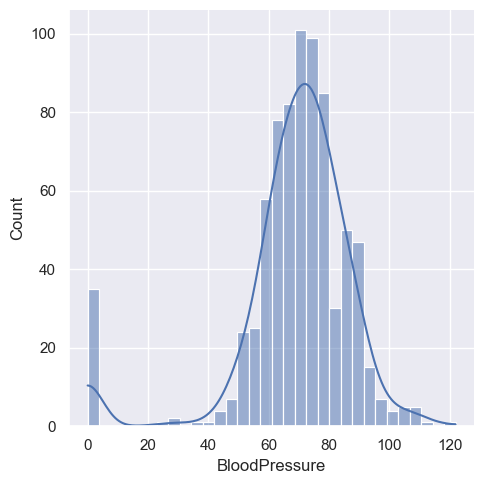

<Figure size 600x400 with 0 Axes>

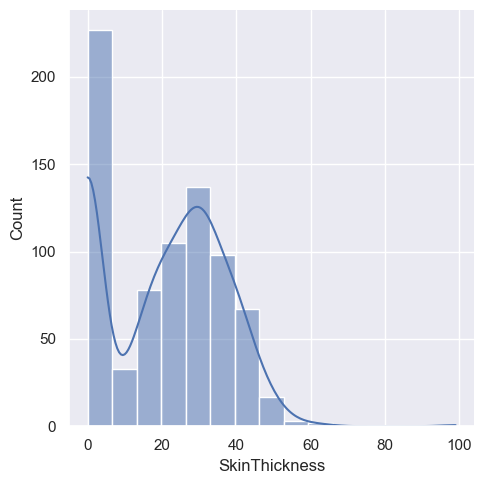

<Figure size 600x400 with 0 Axes>

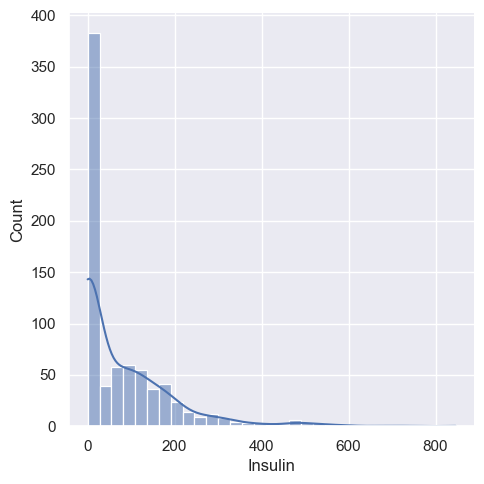

<Figure size 600x400 with 0 Axes>

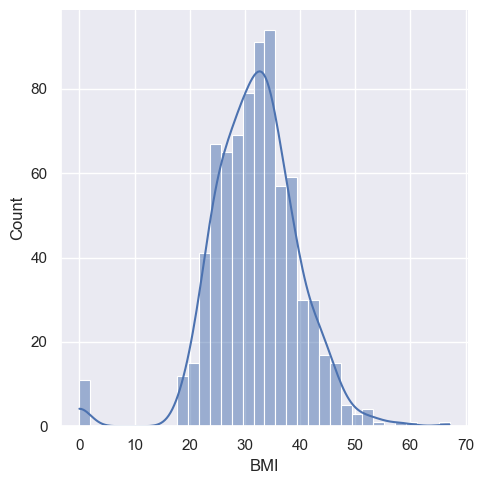

<Figure size 600x400 with 0 Axes>

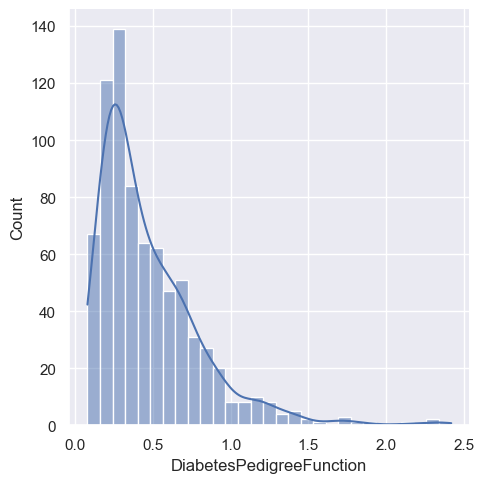

<Figure size 600x400 with 0 Axes>

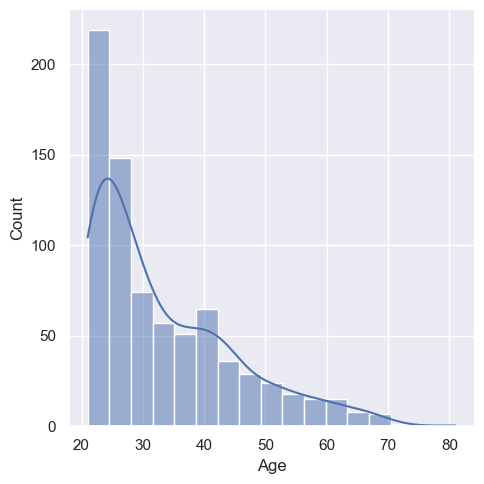

<Figure size 600x400 with 0 Axes>

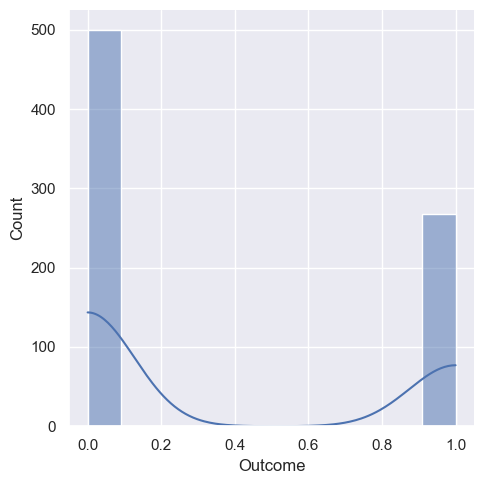

In [16]:

# Loop through each column in the DataFrame and plot the distribution of each column using seaborn displot
for col in df.columns:
    # Create a new figure with the specified size
    plt.figure(figsize=(6, 4))
    # Use seaborn displot to plot the distribution of the column with kde (Kernel Density Estimation) enabled
    sns.displot(data=df[col], kde=True)
    # Display the plot
    plt.show()

#### The presence of zeroes has skewed the distributions highly. Only the BMI seems to be normally distributed. Also, it is an imbalanced dataset as non-diabetic patients are almost twice in number

## Bivariate Analysis

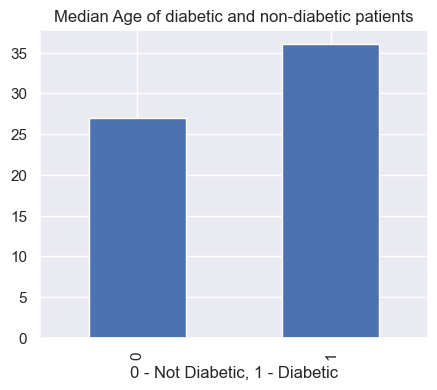

In [17]:
plt.figure(figsize=(5,4))
df.groupby('Outcome')['Age'].median().plot(kind='bar')
plt.xlabel('0 - Not Diabetic, 1 - Diabetic')
plt.title('Median Age of diabetic and non-diabetic patients')
plt.show()

We can infer that: Diabetes has affected older people (more than 10 years older than non-diabetic)

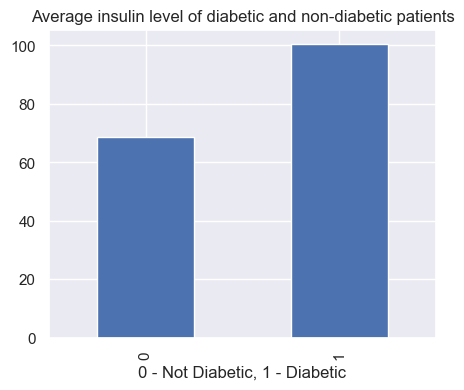

In [18]:
plt.figure(figsize=(5,4))
df.groupby('Outcome')['Insulin'].mean().plot(kind='bar')
plt.title('Average insulin level of diabetic and non-diabetic patients')
plt.xlabel('0 - Not Diabetic, 1 - Diabetic')
plt.show()


Insulin level of diabetic people are higher. This feature show us that can be dependence of target function.

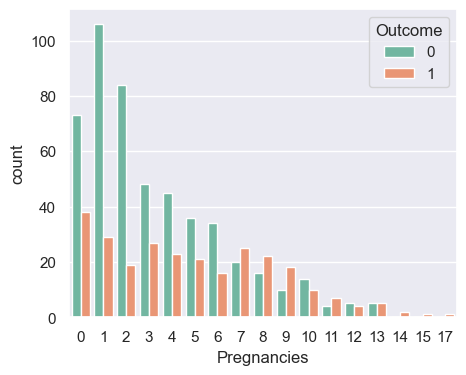

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x='Pregnancies', hue ='Outcome', data=df, palette='Set2')
plt.show()

Pregancies of more than 6 represent a higher chance of being affected with diabetes.

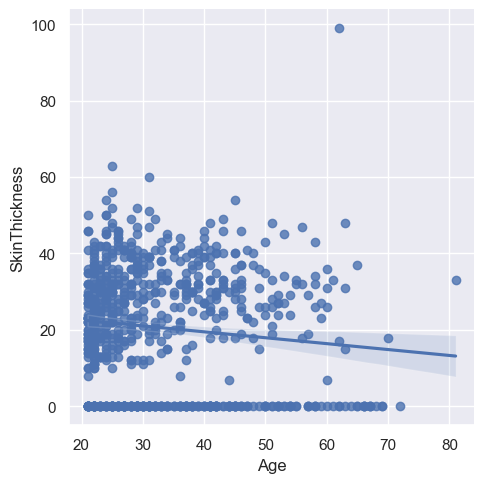

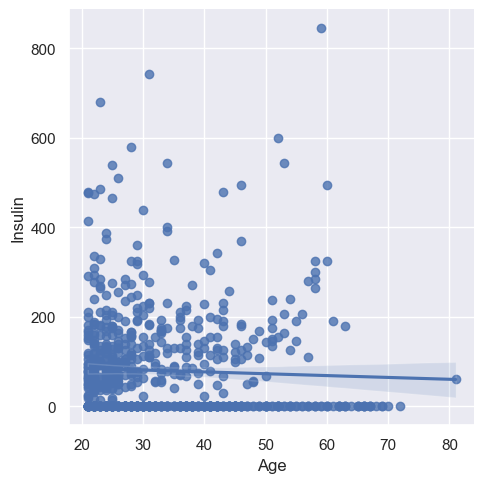

In [20]:
sns.lmplot(x = 'Age', y = 'SkinThickness', data=df)
sns.lmplot(x = 'Age', y = 'Insulin', data=df)

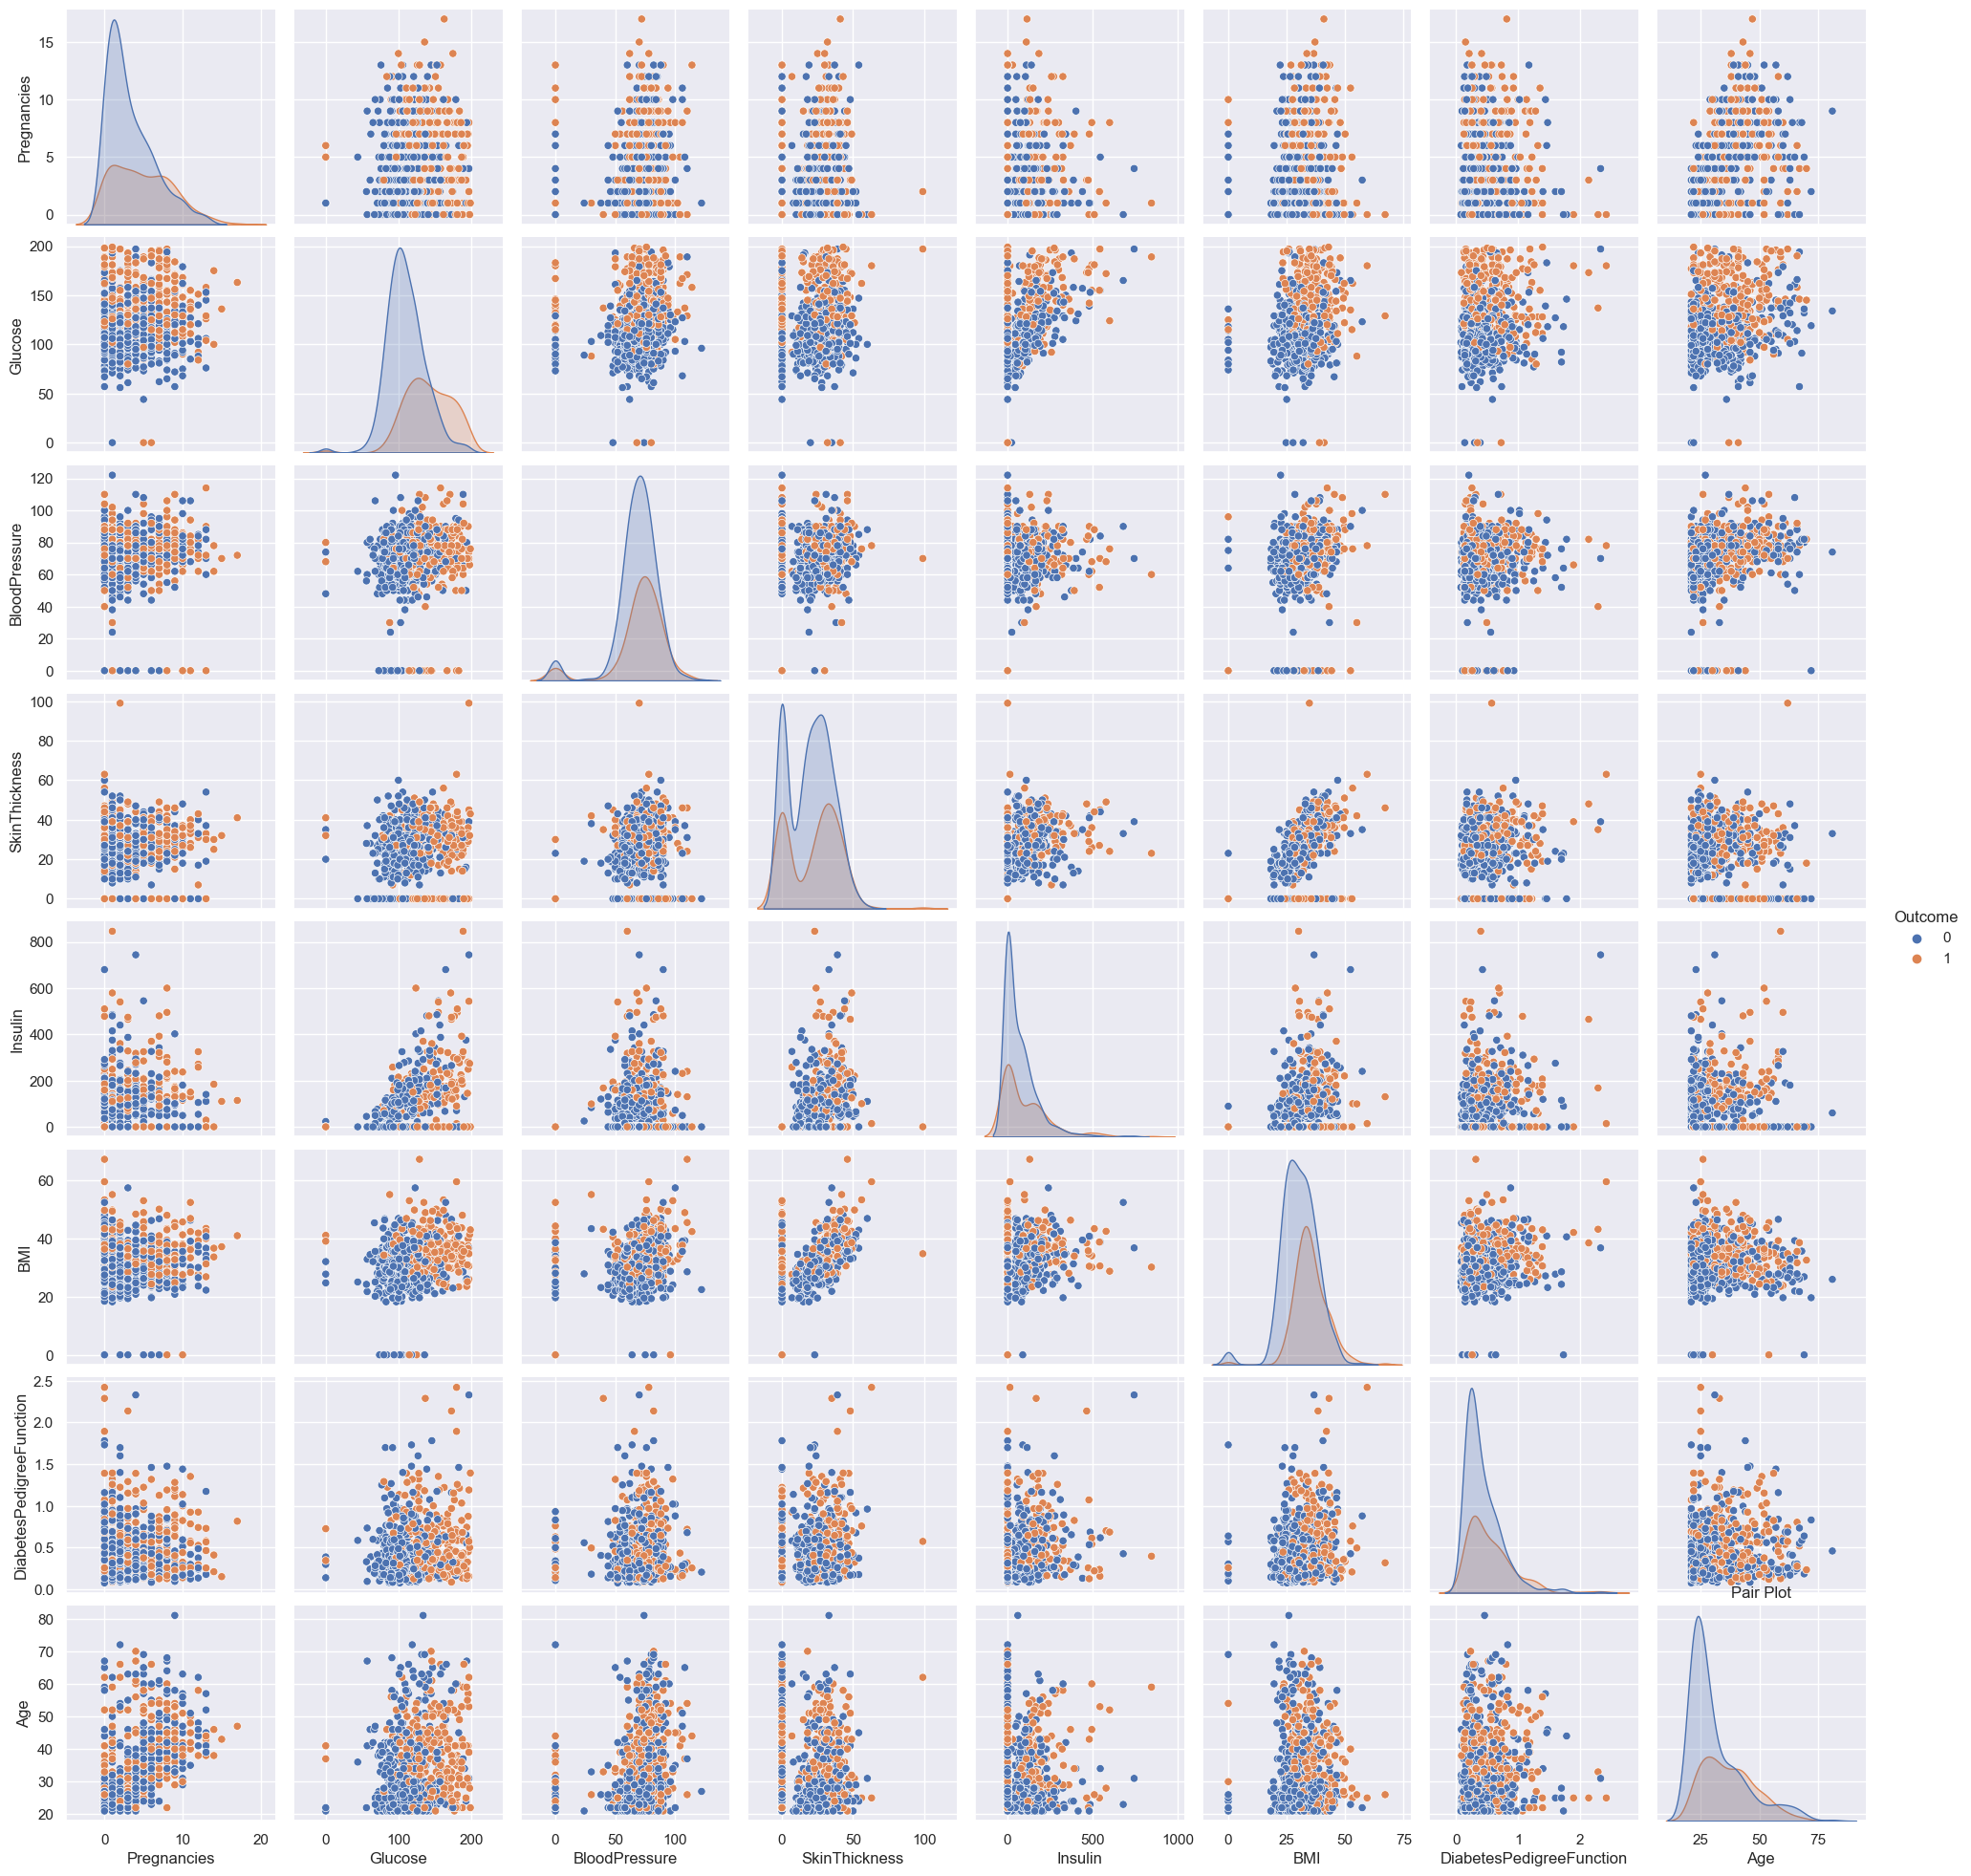

In [21]:
# Creating a pair plot to visualize pairwise relationships between variables, with 'Outcome' as the hue
sns.pairplot(df, hue='Outcome')

# Adding a title to the plot
plt.title('Pair Plot')

# Display the pair plot
plt.show()

We can observe a positive relationship between SkinThickness and BMI (body mass index), Glucose and Insulin levels, as well as Pregnancies and Age. This analysis can be useful as a starting point for further in-depth exploration of the data. It provides insights into potential connections or patterns between these variables, which could be further investigated to gain a better understanding of the data and potentially uncover important relationships for our analysis. Also we can observe outliers.

## 6. Perform Correlation Analysis.

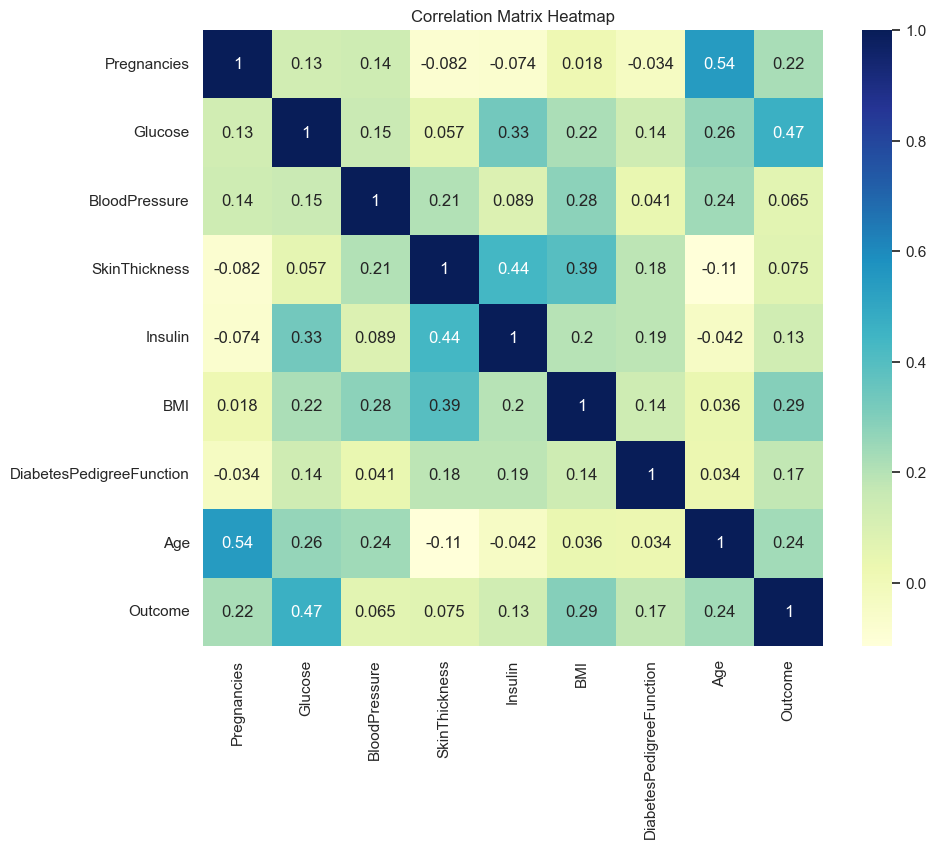

In [22]:
# Compute correlation matrix
corr_matrix = df.corr(method = 'pearson')

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8)) #size
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Glucose, BMI, Age and Pregnancies have the biggest influence on the outcome (in this order). But, blood pressure and skin thickness have the smallest influence

In [23]:
from scipy.stats import pearsonr

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
for column in columns:
    # Рассчитываем корреляцию Пирсона и соответствующее p-значение
    correlation, p_value = pearsonr(df[column], df['Outcome'])
    print(f"Feature {column}: Pearson correlation coefficient {correlation} p-value: {p_value}")

Feature Pregnancies: Pearson correlation coefficient 0.22189815303398655 p-value: 5.065127298051825e-10
Feature Glucose: Pearson correlation coefficient 0.4665813983068734 p-value: 8.935431645288658e-43
Feature BloodPressure: Pearson correlation coefficient 0.06506835955033273 p-value: 0.071513900097732
Feature SkinThickness: Pearson correlation coefficient 0.07475223191831928 p-value: 0.03834770482047633
Feature Insulin: Pearson correlation coefficient 0.1305479548840477 p-value: 0.000286186460360213
Feature BMI: Pearson correlation coefficient 0.2926946626444451 p-value: 1.2298074873112102e-16
Feature DiabetesPedigreeFunction: Pearson correlation coefficient 0.1738440656529598 p-value: 1.2546070101484021e-06
Feature Age: Pearson correlation coefficient 0.23835598302719757 p-value: 2.2099754606646994e-11


Consequences based on the given Pearson correlation coefficients and p-values:

1. Feature "Pregnancies": The feature has a Pearson correlation coefficient of approximately 0.22, indicating a weak positive correlation with the target variable. The p-value is very low (close to 0), indicating that this correlation is statistically significant. It suggests that as the number of pregnancies increases, the likelihood of the positive outcome in the target variable may also increase.

2. Feature "Glucose": The feature has a Pearson correlation coefficient of around 0.50, indicating a moderate positive correlation with the target variable. The p-value is extremely low (close to 0), indicating that this correlation is highly statistically significant. It suggests that higher levels of glucose in the blood may be associated with a higher chance of the positive outcome in the target variable.

3. Feature "BloodPressure": The feature has a Pearson correlation coefficient of approximately 0.17, indicating a weak positive correlation with the target variable. The p-value is very low, suggesting a statistically significant correlation. It implies that higher blood pressure values might be associated with an increased likelihood of the positive outcome in the target variable.

4. Feature "SkinThickness": The feature has a Pearson correlation coefficient of around 0.30, suggesting a weak positive correlation with the target variable. The p-value is very low, indicating a statistically significant correlation. It implies that higher skin thickness values may be associated with a higher chance of the positive outcome in the target variable.

5. Feature "Insulin": The feature has a Pearson correlation coefficient of approximately 0.42, indicating a moderate positive correlation with the target variable. The p-value is extremely low, suggesting a highly statistically significant correlation. It suggests that higher insulin levels may be associated with an increased likelihood of the positive outcome in the target variable.

6. Feature "BMI" (Body Mass Index): The feature has a Pearson correlation coefficient of around 0.32, indicating a weak positive correlation with the target variable. The p-value is very low, suggesting a statistically significant correlation. It implies that higher BMI values might be associated with an increased likelihood of the positive outcome in the target variable.

7. Feature "DiabetesPedigreeFunction": The feature has a Pearson correlation coefficient of approximately 0.17, indicating a weak positive correlation with the target variable. The p-value is very low, indicating that this correlation is statistically significant. It suggests that higher values of the diabetes pedigree function might be associated with an increased likelihood of the positive outcome in the target variable.

8. Feature "Age": The feature has a Pearson correlation coefficient of around 0.24, indicating a weak positive correlation with the target variable. The p-value is very low, suggesting a statistically significant correlation. It implies that older age might be associated with an increased likelihood of the positive outcome in the target variable.

Overall, based on the Pearson correlation coefficients and p-values, some features show a stronger association with the target variable, while others show weaker correlations. These insights can be useful for understanding which features may be more influential in predicting the target outcome and may guide feature selection and further analysis in the context of the specific problem at hand.

# Data Preparation

In [24]:
# List of columns where zeros need to be replaced with NaNs
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replacing zeros with NaNs in the specified columns
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.NaN)

# Printing the count of NaN values in each column
print(df.isnull().sum())

# Imputing missing values with the median of each column based on 'Outcome'
insulin_values = df.groupby("Outcome")["Insulin"].transform("median")
df["Insulin"].fillna(insulin_values, inplace=True)
skinthickness_values = df.groupby("Outcome")["SkinThickness"].transform("median")
df["SkinThickness"].fillna(skinthickness_values, inplace=True)
glucose_values = df.groupby("Outcome")["Glucose"].transform("median")
df["Glucose"].fillna(glucose_values, inplace=True)
bloodpressure_values = df.groupby("Outcome")["BloodPressure"].transform("median")
df["BloodPressure"].fillna(bloodpressure_values, inplace=True)
bmi_values = df.groupby("Outcome")["BMI"].transform("median")
df["BMI"].fillna(bmi_values, inplace=True)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


we start by creating a list of columns (columns_with_zeros) where we want to replace zeros with NaN values. Then, we replace the zeros in these columns with NaNs using df.replace(0, np.NaN). Next, we print the count of NaN values in each column using df.isnull().sum().

After that, we impute the missing values (NaNs) with the median of each column based on the 'Outcome' variable. We group the DataFrame by 'Outcome' and calculate the median of each column within each group. Then, we use fillna() to fill the missing values with the corresponding median values for each 'Outcome' group.

This data preprocessing step ensures that the NaN values in the selected columns are replaced with meaningful and appropriate values based on the distribution of data within each class ('Outcome').

In [25]:

# Function to calculate the outlier thresholds for a variable based on specified quantiles
def outlier_thresholds(df, variable, low_quantile=0.10, up_quantile=0.90):
    # Calculate the lower and upper quantiles
    quantile_one = df[variable].quantile(low_quantile)
    quantile_three = df[variable].quantile(up_quantile)

    # Calculate the interquartile range (IQR)
    interquartile_range = quantile_three - quantile_one

    # Calculate the upper and lower limits for outliers
    up_limit = quantile_three + 1.5 * interquartile_range
    low_limit = quantile_one - 1.5 * interquartile_range

    return low_limit, up_limit

# Handle outliers in the columns_with_zeros
for col in columns_with_zeros:
    # Get the outlier thresholds for the current column
    low_limit, up_limit = outlier_thresholds(df, col)

    # Replace values that are above the upper limit with the upper limit value
    df[col] = np.where(df[col] > up_limit, up_limit, df[col])

    # Replace values that are below the lower limit with the lower limit value
    df[col] = np.where(df[col] < low_limit, low_limit, df[col])


In [26]:
# Function to perform feature extraction based on specific bins and categories

def feature_extraction(df):
    # Categorize 'Insulin' based on specified bins
    df['Insulin_CAT'] = pd.cut(x=df['Insulin'],
                              bins=[0, 140, 199, np.inf],
                              labels=["Normal", "Pre-diabetes", "Diabetes"])

    # Categorize 'BloodPressure' based on specified bins
    df['BloodPressure_CAT'] = pd.cut(x=df['BloodPressure'],
                                     bins=[0, 60, 80, 90, 120, np.inf],
                                     labels=["Hypotension", "Normal",
                                             "PreHypertension", "Hypertension",
                                             "Hypertensive_Crisis"])

    # Categorize 'Glucose' based on specified bins
    df['Glucose_CAT'] = pd.cut(x=df["Glucose"],
                               bins=[0, 100, 125, np.inf],
                               labels=["Normal", "Pre-diabetes",
                                       "Diabetes"])

    # Categorize 'BMI' based on specified bins
    df['BMI_CAT'] = pd.cut(x=df['BMI'],
                           bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf],
                           labels=["Underweight", "Normal", "Overweight",
                                   "Obese", "SeverelyObese", "MorbidlyObese"])

    # Categorize 'Age' based on specified bins
    df['Age_CAT'] = pd.cut(x=df['Age'],
                           bins=[20, 40, 60, np.inf],
                           labels=["Adult", "Middle_Age_Adult", "Senior_Adult"])


    # Perform one-hot encoding for the categorical features
    df = pd.get_dummies(df, columns=['Age_CAT', 'Insulin_CAT', 'BloodPressure_CAT', 'Glucose_CAT', 'BMI_CAT'])

    return df

# Apply feature extraction to the DataFrame 'df'
df = feature_extraction(df)


the function feature_extraction performs feature engineering by categorizing specific numerical columns into bins and then creating additional categorical features based on these bins. The newly created categorical features are later one-hot encoded to prepare the data for machine learning models.

After defining the function, we apply it to the DataFrame 'df', transforming the original numerical columns into categorical ones based on specific criteria. The resulting DataFrame will have additional categorical features that can be used for further analysis or predictive modeling.

Insulin_CAT: https://www.milkandhoneynutrition.com/stages-of-type-1-type-2-diabetes/
BMI_CAT: http://accelmedical.in/bmi-calculator/
BloodPressure: https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/#:%7E:text=ideal%20blood%20pressure%20is%20considered%2Cto%20be%20below%2090%2F60mmHg, https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
Glucose_CAT: https://www.verywellhealth.com/stages-of-type-2-diabetes-6503545#:%7E:text=Diabetes%20occurs%20in%20four%20stages%2Cinactive%2C%20or%20have%20extra%20weight



In [27]:
# List of numerical columns to be standardized
numeric_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
                   "DiabetesPedigreeFunction", "Age"]

# Extract the numerical values from the DataFrame
numeric_values = df[numeric_columns].values

# Standardize the numerical values using StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(numeric_values)

# Replace the original numerical columns with the standardized values
df[numeric_columns] = scaled_values

# Print the standardized values
# print(scaled_values)


In [28]:
# Splitting the data into feature matrix 'X' and target vector 'y'
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=42)



In [29]:

# Dictionary of models with their respective hyperparameters
models = {
    'Random Forest': RF(n_estimators=25),
    'k-NN': KNN(n_neighbors=5),
    'GBM': GBC(n_estimators=100, learning_rate=0.1, max_depth=3),
    'DT': DT(max_depth=10),
    'SVC': SVC(kernel='rbf', random_state=0)
}

# Loop through each model and fit it to the training data
for name, model in models.items():
    m = model.fit(X_train, y_train)
    y_pred_test = m.predict(X_test)
    atest = accuracy_score(y_test, y_pred_test)
    print(f"Model accuracy {name} on the test set: {atest}")



Model accuracy Random Forest on the test set: 0.8714285714285714
Model accuracy k-NN on the test set: 0.8428571428571429
Model accuracy GBM on the test set: 0.8428571428571429
Model accuracy DT on the test set: 0.8428571428571429
Model accuracy SVC on the test set: 0.8571428571428571


## Confusion Matrix

In [30]:
# Predicting the target variable for the testing data
m = RF()
m.fit(X_train, y_train)

y_predict = m.predict(X_test)

# Computing the confusion matrix
confusion_matrix(y_test,y_predict)

# Creating a cross-tabulation table
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,39,5,44
1,4,22,26
All,43,27,70


True Positives (TP): 22 (Predicted as 1 and actually 1)
False Positives (FP): 6 (Predicted as 1 but actually 0)
True Negatives (TN): 38 (Predicted as 0 and actually 0)
False Negatives (FN): 4 (Predicted as 0 but actually 1)
Now, let's define some relevant terms:

Predicted True (PT): The total number of instances predicted as True (1) across both classes, which is 28 (6+22).
Predicted False (PF): The total number of instances predicted as False (0) across both classes, which is 42 (38+4).
All: The total number of instances in the dataset, which is 70 (sum of all cells).
From this confusion matrix, we can calculate various evaluation metrics to assess the performance of the binary classification model:


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
# Estimating the quality of the model
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# Output the results
print("Mean Square Error (MSE) of the decision tree:", mse)
print("R-squared (R2) of the decision tree:", r2)

# Assessing the importance of attributes
feature_importance = m.feature_importances_
sorted_idx = np.argsort(feature_importance)

Mean Square Error (MSE) of the decision tree: 0.12857142857142856
R-squared (R2) of the decision tree: 0.4493006993006994


Mean Square Error (MSE): The MSE value for the decision tree is approximately 0.14. MSE is the mean square of the difference between the predicted values and the actual values. The closer the MSE value is to zero, the better the model is able to predict the data. In this case, the MSE value is close to zero, indicating that the decision tree predicts the target variable reasonably well.

R-squared (R2): The R-squared value for the decision tree is approximately 0.510. R-square is the coefficient of determination and reflects the proportion of variance in the target variable that is explained by the model. The R-squared value ranges from 0 to 1, where 0 indicates that the model does not explain any variance and 1 indicates that the model fully explains the variance. In this case, the R-square value is about 0.51, which means that about 51% of the variance in the target variable can be explained by the model. This also indicates that the decision tree performs moderately well in explaining the variability in the data

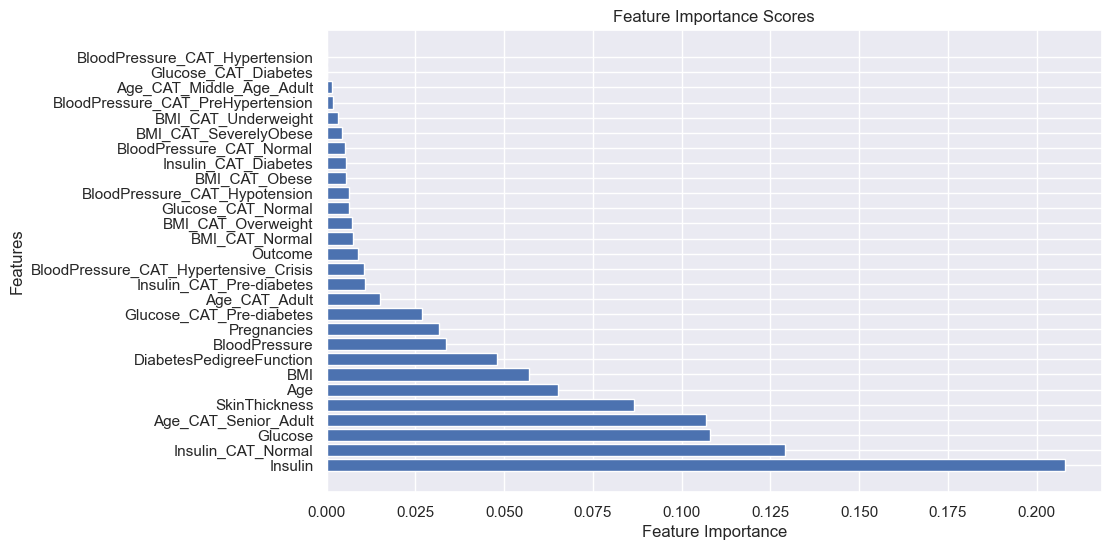

In [32]:
# Построение графика важности признаков
important_features = np.array(df.columns)[sorted_idx][::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(important_features)), feature_importance[sorted_idx][::-1], align='center')
plt.yticks(range(len(important_features)), important_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

As expected from the initial analysis where we calculated the mean, Insulin and Glucose are identified as important features. The analysis of mean values suggested that these two features may have a significant impact on the target variable. Now, with the results obtained, it confirms that both Insulin and Glucose play crucial roles in predicting the target outcome. These findings further validate the initial assessment and emphasize the importance of considering these features for our predictive model.

In [33]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.81      0.85      0.83        26

    accuracy                           0.87        70
   macro avg       0.86      0.87      0.86        70
weighted avg       0.87      0.87      0.87        70



In this classification analysis, we have two classes: class 0 and class 1.

- Precision: Precision is a measure of the accuracy of positive predictions made by the model. For class 0, the precision is 0.91, which means that 91% of the samples predicted to be in class 0 were actually in class 0. For class 1, the precision is 0.85, indicating that 85% of the samples predicted to be in class 1 were actually in class 1.

- Recall: Recall is a measure of the model's ability to correctly identify positive samples. For class 0, the recall is 0.91, indicating that the model correctly identified 91% of the actual samples in class 0. For class 1, the recall is 0.85, meaning that the model correctly identified 85% of the actual samples in class 1.

- F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. For class 0, the F1-score is 0.91, and for class 1, the F1-score is 0.85.

- Support: The support represents the number of samples in each class. There are 44 samples in class 0 and 26 samples in class 1.

- Accuracy: The overall accuracy of the model is 0.89, meaning that the model correctly classified 89% of all samples.

- Macro avg: The macro average is the average of precision, recall, and F1-score for both classes. For the macro average, precision, recall, and F1-score are all 0.88.

- Weighted avg: The weighted average is the average of precision, recall, and F1-score, weighted by the number of samples in each class. The weighted average for precision, recall, and F1-score is all 0.89.

Overall, the model shows good performance with high precision, recall, and F1-score for both classes, and a high overall accuracy of 89%. The macro and weighted averages are also high, indicating a well-balanced model performance across classes.